In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Retail.OrderHistory.2.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Website                         42 non-null     object 
 1   Order ID                        42 non-null     object 
 2   Order Date                      42 non-null     object 
 3   Purchase Order Number           0 non-null      float64
 4   Currency                        42 non-null     object 
 5   Unit Price                      42 non-null     float64
 6   Unit Price Tax                  42 non-null     float64
 7   Shipping Charge                 42 non-null     float64
 8   Total Discounts                 42 non-null     object 
 9   Total Owed                      42 non-null     float64
 10  Shipment Item Subtotal          42 non-null     float64
 11  Shipment Item Subtotal Tax      42 non-null     float64
 12  ASIN                            42 non

In [10]:
columns_to_drop = ['Website','Order ID','Purchase Order Number','Currency', 'Shipment Item Subtotal', 'Shipment Item Subtotal Tax','ASIN', 'Product Condition', 'Payment Instrument Type', 'Order Status', 'Ship Date', 'Billing Address','Shipment Status', 'Shipping Option', 'Shipping Address', 'Carrier Name & Tracking Number', 'Gift Message', 'Gift Sender Name', 'Gift Recipient Contact Details']

In [13]:
df = df.drop(columns_to_drop, axis=1)

In [15]:
df.shape

(42, 8)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order Date       42 non-null     object 
 1   Unit Price       42 non-null     float64
 2   Unit Price Tax   42 non-null     float64
 3   Shipping Charge  42 non-null     float64
 4   Total Discounts  42 non-null     object 
 5   Total Owed       42 non-null     float64
 6   Quantity         42 non-null     int64  
 7   Product Name     42 non-null     object 
dtypes: float64(4), int64(1), object(3)
memory usage: 2.8+ KB


In [17]:
df.head()

,Order Date,Unit Price,Unit Price Tax,Shipping Charge,Total Discounts,Total Owed,Quantity,Product Name
0,10/18/2022 19:56:58 UTC,1.35,0.00,0.00,0,2.70,2,"by Amazon Melon & Grape, 300g"
1,10/14/2022 10:39:19 UTC,11.99,0.00,0.00,0,11.99,1,IMPROVEFIT Posture Corrector for Men and Women...
2,10/14/2022 10:39:19 UTC,23.32,4.67,0.00,'-1.4',26.59,1,Surface Pro 8 Hub Docking Station with 4K HDMI...
3,07/25/2022 15:54:47 UTC,19.81,0.00,0.00,0,19.81,1,SanDisk Ultra Flair Memoria flash USB 3.0 de 1...
4,06/21/2022 22:13:26 UTC,10.82,2.17,4.99,0,17.98,1,Wrist Wraps Weightlifting Powerlifting - Set o...


In [22]:
df.describe()

,Unit Price,Unit Price Tax,Shipping Charge,Total Owed,Quantity
count,42.000000,42.000000,42.000000,42.000000,42.000000
mean,11.918810,1.181429,1.002857,13.916190,1.023810
std,8.089375,1.637256,1.894024,9.113939,0.154303
min,0.950000,0.000000,0.000000,0.370000,1.000000
25%,7.092500,0.000000,0.000000,8.240000,1.000000
50%,9.970000,0.245000,0.000000,13.230000,1.000000
75%,14.990000,1.805000,0.250000,17.732500,1.000000
max,36.990000,7.540000,5.990000,43.450000,2.000000


In [ ]:
# We can extract a few insights from the descriptive statistics: 
    # Over the years, I have made a total of 42 orders in Amazon
    # My average spend for order is 13.9£
    # My cheapest order was 0.37£!? I should investigate this further
    # My most expensive order was 43.45£
    # My first order was on 31 of October 2016, and it was actually two items: a case and a screen protector for my new Iphone 7!
    # My last order was on 18 of October 2022, and it was a small grocery shopping at Amazon Fresh store. 

In [21]:
print('I have spent on Amazon a total of: £', df['Total Owed'].sum())

I have spent on Amazon a total of: £ 584.48


In [48]:
#Let's find out how much I have spent on tax
print('I have spent on Tax a total of: £', df['Unit Price Tax'].sum())

I have spent on Tax a total of: £ 49.62


In [23]:
#Let's find out when was my first and last order!

In [38]:
df_1 = df[['Order Date', 'Product Name']]

In [39]:
df_1.head()

,Order Date,Product Name
0,10/18/2022 19:56:58 UTC,"by Amazon Melon & Grape, 300g"
1,10/14/2022 10:39:19 UTC,IMPROVEFIT Posture Corrector for Men and Women...
2,10/14/2022 10:39:19 UTC,Surface Pro 8 Hub Docking Station with 4K HDMI...
3,07/25/2022 15:54:47 UTC,SanDisk Ultra Flair Memoria flash USB 3.0 de 1...
4,06/21/2022 22:13:26 UTC,Wrist Wraps Weightlifting Powerlifting - Set o...


In [40]:
df_1.tail()

,Order Date,Product Name
37,08/21/2017 12:41:19 UTC,JETech 0870B-SP-WATCH-42-SOFTX3 Clear screen p...
38,12/30/2016 16:25:28 UTC,EtekcityÂ® PulsiOxÃ­metro de Dedo y Monitor de...
39,12/05/2016 11:06:37 UTC,Men's Knitted Touch Screen Gloves with grey ti...
40,10/31/2016 14:06:06 UTC,"iPhone 7 Plus Screen Protector, SpigenÂ® [Easy..."
41,10/31/2016 14:06:06 UTC,"iPhone 7 Plus Case, SpigenÂ® [Liquid Crystal] ..."


In [41]:
#let's investigate my minimun order further!

In [42]:
print(df['Total Owed'] < 1)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10     True
11    False
12     True
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
Name: Total Owed, dtype: bool


In [43]:
# We can see that there are two rows (10, 12) that meet the condition of being less than 1£! Lets print it!

In [44]:
min_orders = df.loc[df['Total Owed'] < 1, 'Product Name']

In [45]:
print(min_orders)

10            by Amazon Skimmed Milk, 2 Pints / 1.136L
12    by Amazon Rainforest Alliance Bananas, Pack of 5
Name: Product Name, dtype: object


In [46]:
#Turns out that these orders were not actually orders from Amazon.uk, but items purchased at Amazon fresh store, bananas and milk. 

In [49]:
df['Order Date'] = pd.to_datetime(df['Order Date']).dt.date

In [51]:
print(df)

    Order Date  Unit Price  Unit Price Tax  Shipping Charge Total Discounts  \
0   2022-10-18        1.35            0.00             0.00               0   
1   2022-10-14       11.99            0.00             0.00               0   
2   2022-10-14       23.32            4.67             0.00          '-1.4'   
3   2022-07-25       19.81            0.00             0.00               0   
4   2022-06-21       10.82            2.17             4.99               0   
5   2022-06-09       14.18            0.57             0.00               0   
6   2022-05-23        8.26            1.73             2.99               0   
7   2022-03-09        8.32            1.67             0.00               0   
8   2022-03-08        5.98            1.20             0.00               0   
9   2022-02-13        3.50            0.00             0.00         '-2.41'   
10  2022-02-13        0.95            0.00             0.00         '-0.58'   
11  2022-02-13        4.00            0.00          

In [52]:
import matplotlib.pyplot as plt

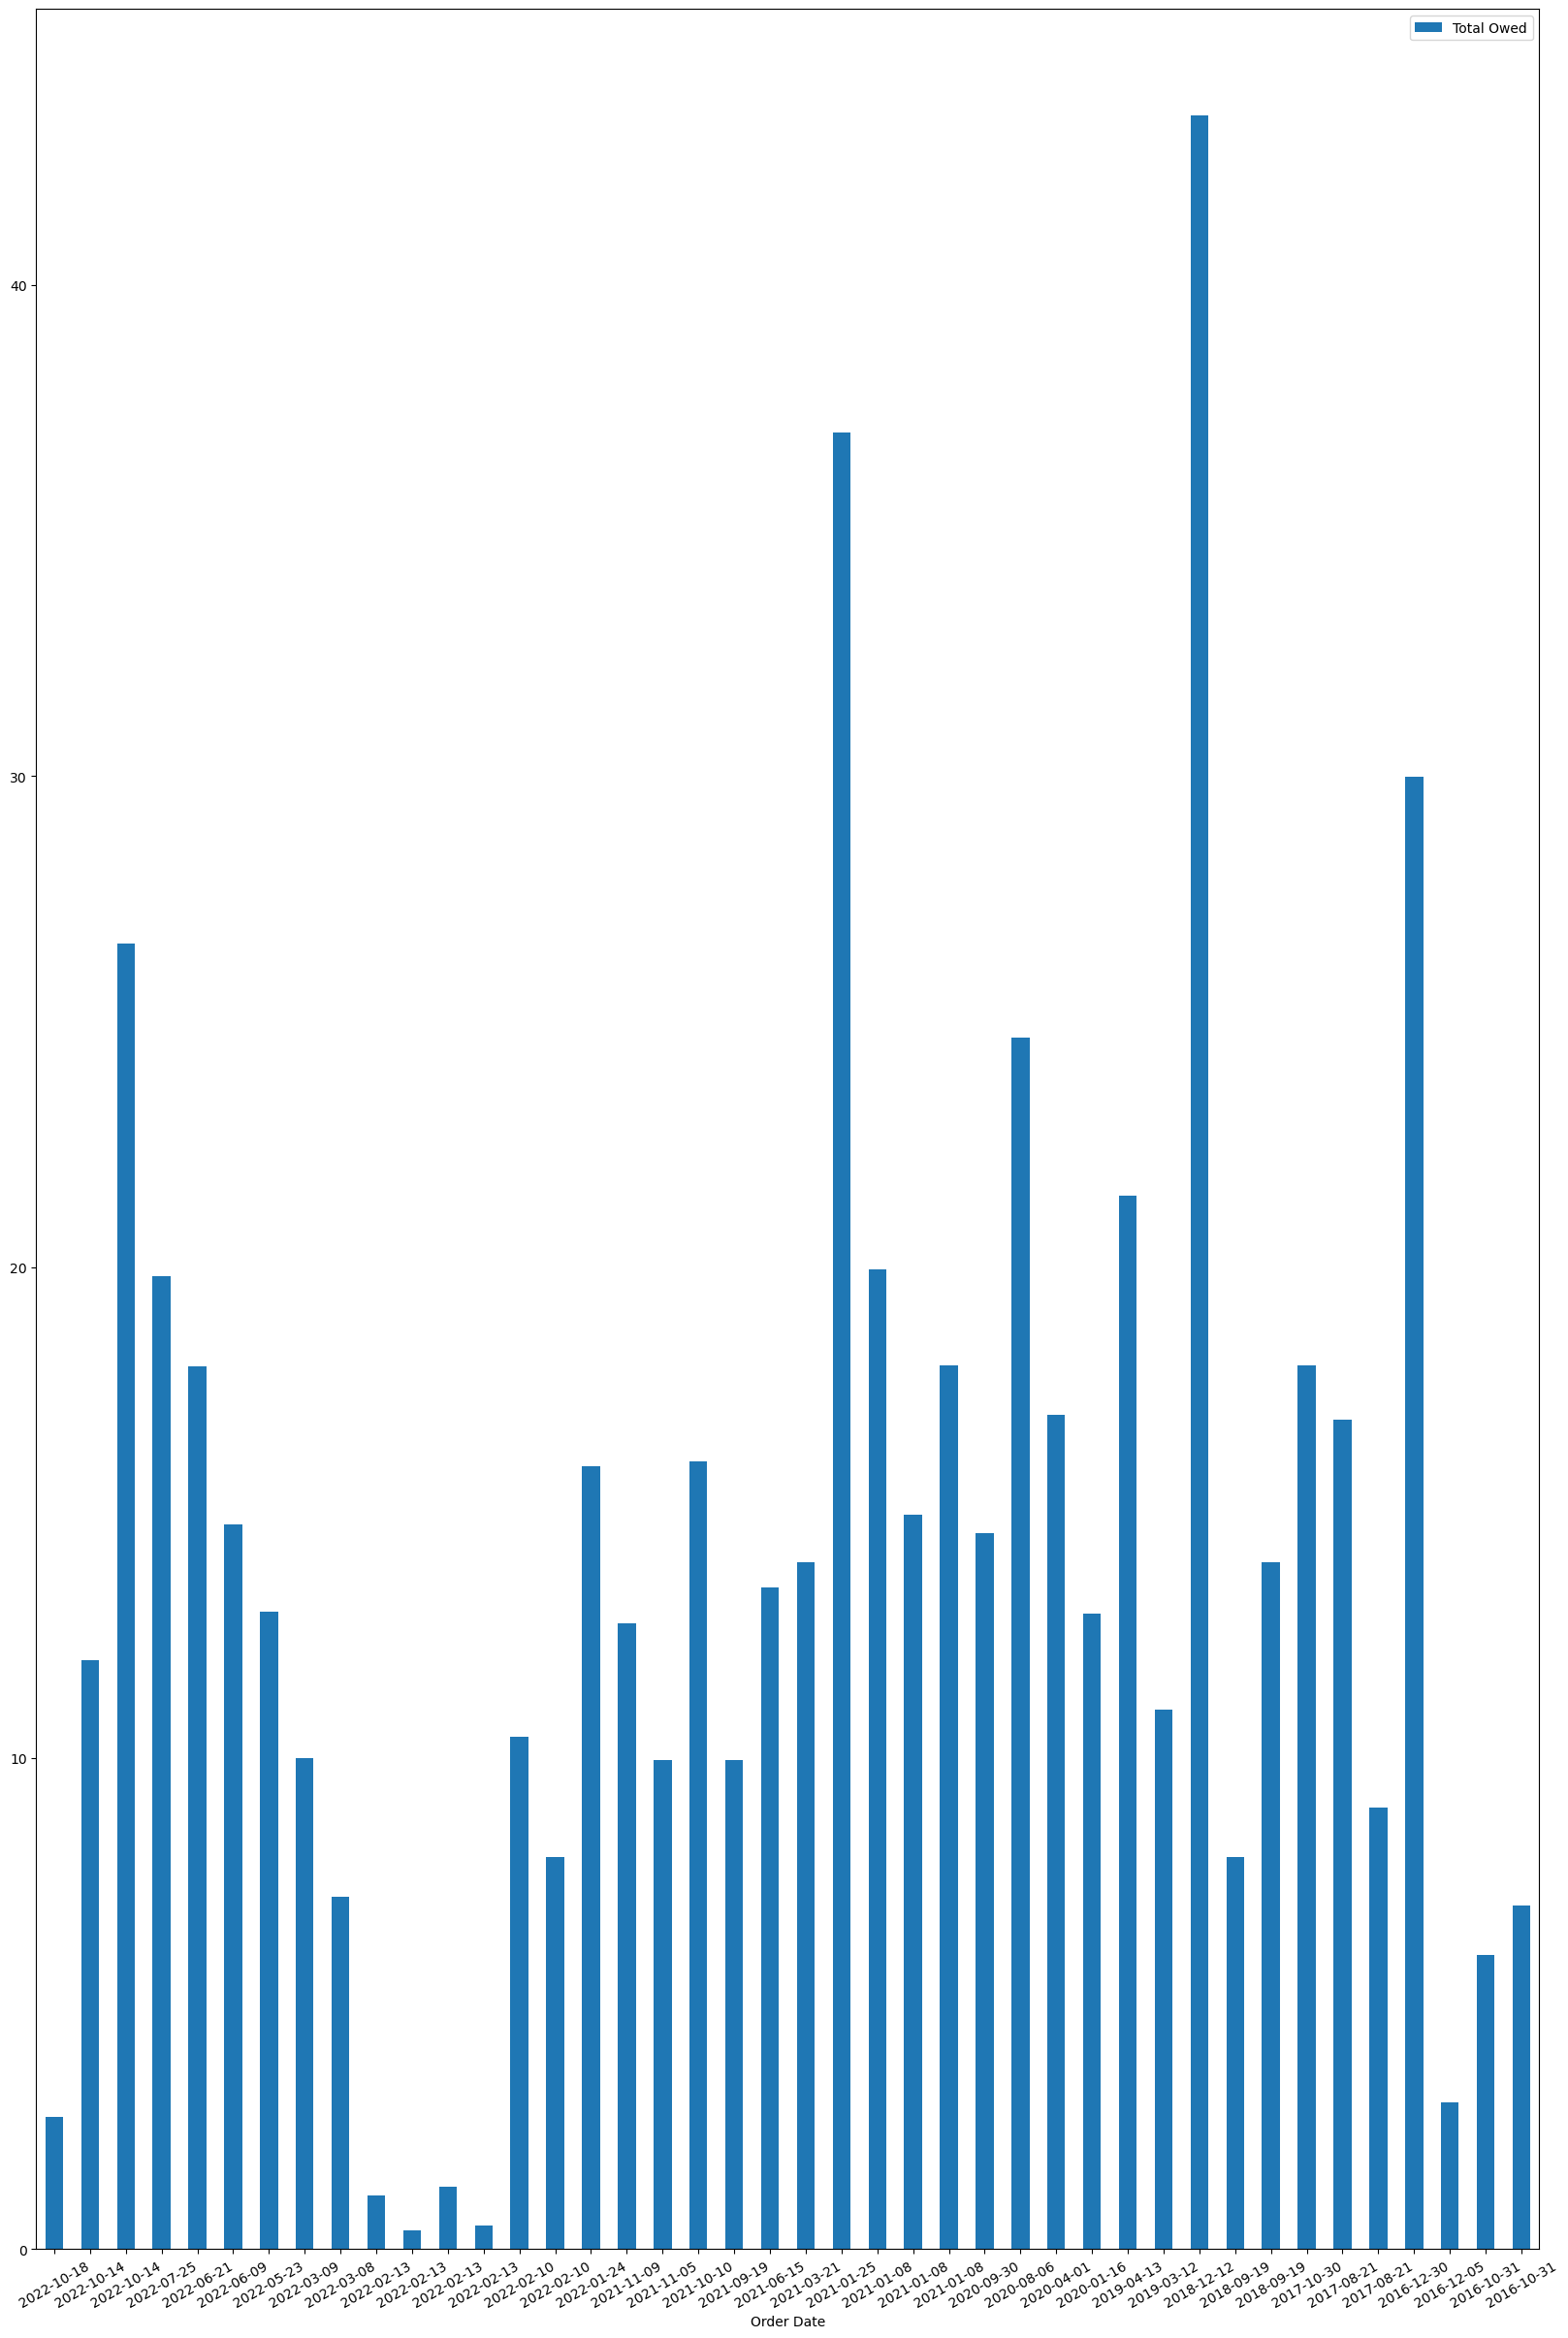

In [57]:
bar = df.plot.bar(x='Order Date', y='Total Owed', rot= 30, figsize=(20, 30))